Notebook Setup:
---

In [82]:
import os
import sys

In [83]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
# from google.colab import drive
# drive.mount('/content/drive')

In [85]:
# path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A5/src' #@param {type: "string"}
# sys.path.append(path)

**Tasks:**
1. Refine the given implementaion of the A* search by outputting the number of nodes expanded on the way to the goal ('green' cell) and the total cost of the path.
2. Implement a different version of the A* search which uses a Manhattan distance as the heuristic function. Compare the results with previous version of the algorithm. Visualize the path using differrent colors for its components (from the start to goal1, from the goal1 to.., etc.)
3. Create the refined Maze:
* the food locations are 10% of the space and distributed randomly (even the start and finish points may contain food).
* there are 5 Ghosts hidden (the Agent can't figure out the location of the GHost) in the Maze (randomly, but not in the start and finish points, the locations of Fixed Food Dots and Ghosts must also be different).
4. The Pac-man Agent must find all Fixed Food Dots and then find the finish point (the results of task 2 are supposed to be used). The search of Fixed Food Dots must be rational: the 1st 'food' goal must be the most cost-optimal among other Food Dots.
5. The inital perforamnce of Agent is 20% of space cells. After reaching a Fixed Food Dot the agent's performance doubles. If the Agent encounters Ghosts, it fights. But only the strong Agent (with performance > 30% of space cells) can win. Otherwise the Agent will be killed by Ghost. If the Agent wins, he will lose 10% of his previous effectiveness after the battle.
6. Implemet IDA* or RBFS (the algorithm is assigned to the team during the lab class) search and apply it for tasks 4-5.

Tasks 1-2
---

In [86]:
from mazeData import makeMaze

n = 10
a = makeMaze(n)
print(a)
print(a.shape)

# 0s represent walls.
# 1s represent free spaces.
# 2s represent food.

[[0 2 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 0 1]
 [1 1 1 1 2 1 1 1 2 1]
 [1 0 1 1 1 1 1 1 2 0]
 [1 1 1 0 1 1 1 1 0 1]
 [1 0 1 0 1 1 1 1 1 0]
 [1 1 1 0 0 1 1 1 1 1]
 [0 1 1 1 2 2 0 1 1 1]
 [0 1 1 1 0 1 1 0 0 1]
 [0 1 2 1 1 1 1 1 1 1]]
(10, 10)


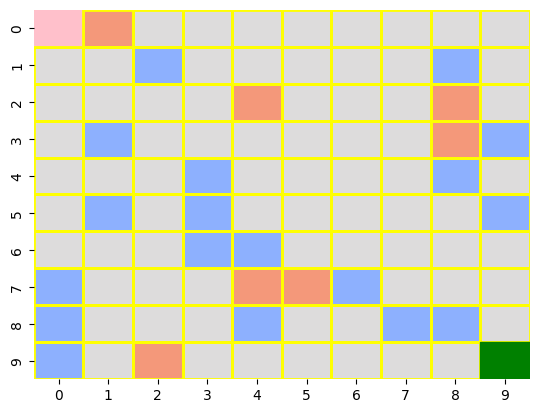

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    #print(colors)
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()

draw_maze(a)

In [88]:
from mazeData import defineMazeAvailableActions

mazeAvailableActs = defineMazeAvailableActions(a)
mazeAvailableActs

{(0, 0): [],
 (0, 1): ['right', 'down'],
 (0, 2): ['left', 'right'],
 (0, 3): ['left', 'right', 'down'],
 (0, 4): ['left', 'right', 'down'],
 (0, 5): ['left', 'right', 'down'],
 (0, 6): ['left', 'right', 'down'],
 (0, 7): ['left', 'right', 'down'],
 (0, 8): ['left', 'right'],
 (0, 9): ['left', 'down'],
 (1, 0): ['right', 'down'],
 (1, 1): ['left', 'up', 'down'],
 (1, 2): [],
 (1, 3): ['up', 'right', 'down'],
 (1, 4): ['left', 'up', 'right', 'down'],
 (1, 5): ['left', 'up', 'right', 'down'],
 (1, 6): ['left', 'up', 'right', 'down'],
 (1, 7): ['left', 'up', 'down'],
 (1, 8): [],
 (1, 9): ['up', 'down'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'right'],
 (2, 2): ['left', 'right', 'down'],
 (2, 3): ['left', 'up', 'right', 'down'],
 (2, 4): ['left', 'up', 'right', 'down'],
 (2, 5): ['left', 'up', 'right', 'down'],
 (2, 6): ['left', 'up', 'right', 'down'],
 (2, 7): ['left', 'up', 'right', 'down'],
 (2, 8): ['left', 'right', 'down'],
 (2, 9): ['left', 'up'],
 (3, 0): ['up', 

In [89]:
from mazeData import makeMazeTransformationModel

maze = makeMazeTransformationModel(mazeAvailableActs)
maze

{(0, 0): {},
 (0, 1): {'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'right': (0, 5), 'down': (1, 4)},
 (0, 5): {'left': (0, 4), 'right': (0, 6), 'down': (1, 5)},
 (0, 6): {'left': (0, 5), 'right': (0, 7), 'down': (1, 6)},
 (0, 7): {'left': (0, 6), 'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'right': (0, 9)},
 (0, 9): {'left': (0, 8), 'down': (1, 9)},
 (1, 0): {'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'down': (2, 1)},
 (1, 2): {},
 (1, 3): {'up': (0, 3), 'right': (1, 4), 'down': (2, 3)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'right': (1, 5), 'down': (2, 4)},
 (1, 5): {'left': (1, 4), 'up': (0, 5), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'up': (0, 6), 'right': (1, 7), 'down': (2, 6)},
 (1, 7): {'left': (1, 6), 'up': (0, 7), 'down': (2, 7)},
 (1, 8): {},
 (1, 9): {'up': (0, 9), 'down': (2, 9)},
 (2, 0)

In [90]:
from mazeGraphClass import mazeGraph

mazeWorldGraph = mazeGraph(maze)
mazeWorldGraph.graph_dict

{(0, 0): {},
 (0, 1): {'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'right': (0, 5), 'down': (1, 4)},
 (0, 5): {'left': (0, 4), 'right': (0, 6), 'down': (1, 5)},
 (0, 6): {'left': (0, 5), 'right': (0, 7), 'down': (1, 6)},
 (0, 7): {'left': (0, 6), 'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'right': (0, 9)},
 (0, 9): {'left': (0, 8), 'down': (1, 9)},
 (1, 0): {'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'down': (2, 1)},
 (1, 2): {},
 (1, 3): {'up': (0, 3), 'right': (1, 4), 'down': (2, 3)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'right': (1, 5), 'down': (2, 4)},
 (1, 5): {'left': (1, 4), 'up': (0, 5), 'right': (1, 6), 'down': (2, 5)},
 (1, 6): {'left': (1, 5), 'up': (0, 6), 'right': (1, 7), 'down': (2, 6)},
 (1, 7): {'left': (1, 6), 'up': (0, 7), 'down': (2, 7)},
 (1, 8): {},
 (1, 9): {'up': (0, 9), 'down': (2, 9)},
 (2, 0)

In [91]:
mazeWorldGraph.g

{(0, 1): {(0, 2): 2, (1, 1): 1},
 (0, 2): {(0, 1): 2, (0, 3): 2},
 (0, 3): {(0, 2): 2, (0, 4): 2, (1, 3): 1},
 (0, 4): {(0, 3): 2, (0, 5): 2, (1, 4): 1},
 (0, 5): {(0, 4): 2, (0, 6): 2, (1, 5): 1},
 (0, 6): {(0, 5): 2, (0, 7): 2, (1, 6): 1},
 (0, 7): {(0, 6): 2, (0, 8): 2, (1, 7): 1},
 (0, 8): {(0, 7): 2, (0, 9): 2},
 (0, 9): {(0, 8): 2, (1, 9): 1},
 (1, 0): {(1, 1): 2, (2, 0): 1},
 (1, 1): {(1, 0): 2, (0, 1): 3, (2, 1): 1},
 (1, 3): {(0, 3): 3, (1, 4): 2, (2, 3): 1},
 (1, 4): {(1, 3): 2, (0, 4): 3, (1, 5): 2, (2, 4): 1},
 (1, 5): {(1, 4): 2, (0, 5): 3, (1, 6): 2, (2, 5): 1},
 (1, 6): {(1, 5): 2, (0, 6): 3, (1, 7): 2, (2, 6): 1},
 (1, 7): {(1, 6): 2, (0, 7): 3, (2, 7): 1},
 (1, 9): {(0, 9): 3, (2, 9): 1},
 (2, 0): {(1, 0): 3, (2, 1): 2, (3, 0): 1},
 (2, 1): {(2, 0): 2, (1, 1): 3, (2, 2): 2},
 (2, 2): {(2, 1): 2, (2, 3): 2, (3, 2): 1},
 (2, 3): {(2, 2): 2, (1, 3): 3, (2, 4): 2, (3, 3): 1},
 (2, 4): {(2, 3): 2, (1, 4): 3, (2, 5): 2, (3, 4): 1},
 (2, 5): {(2, 4): 2, (1, 5): 3, (2, 6): 2, 

In [92]:
from mazeProblemClass import MazeProblem
from mazeData import getFoodLocation

initState, goalState = (0,0), getFoodLocation(a)
print("Initial State: {}".format(initState))
print("Goal State(s): {}".format(goalState))
mp1 = MazeProblem(initState,goalState,mazeWorldGraph)

Initial State: (0, 0)
Goal State(s): (0, 1)


In [93]:
from nodeClass import Node
from manhattanDistance import *
import math

node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))#Find the Euclidean distance between one and two dimensional points:
print(node.path_cost+manhattanDistance.calc(node.state, mp1.goal))#Find the Manhattan distance between one and two dimensional points:

1.0
1


In [94]:
#Task 1
from agentsPrograms import A_StarSearchAgentProgram

f1 = A_StarSearchAgentProgram(math.dist)
f1(mp1)

Goal:  (0, 1)
Frontier:  [(1.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
Current node has 0 child nodes (expansions).
Goal:  (0, 1)
Frontier:  []
Frontier is empty


In [95]:
#Task 2
f2 = A_StarSearchAgentProgram(manhattanDistance.calc)
f2(mp1)

Goal:  (0, 1)
Frontier:  [(1, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
Current node has 0 child nodes (expansions).
Goal:  (0, 1)
Frontier:  []
Frontier is empty


Tasks 3-4
---

In [96]:
# Task 3
from myMazeData import makeMaze

n = 10
a = makeMaze(n)
print(a)
print(a.shape)

# 0s represent walls.
# 1s represent free spaces.
# 2s represent food.
# 3s represent ghosts.

[[1 1 0 3 1 2 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 2]
 [0 0 1 1 2 2 1 2 1 1]
 [1 1 1 1 1 1 2 0 0 1]
 [1 0 0 1 1 2 2 1 1 0]
 [1 1 1 2 1 1 0 1 1 1]
 [0 3 3 3 1 0 1 1 1 1]
 [2 1 1 1 1 1 1 1 2 1]
 [1 1 3 1 0 1 1 2 1 0]
 [1 1 0 0 1 1 0 1 1 1]]
(10, 10)


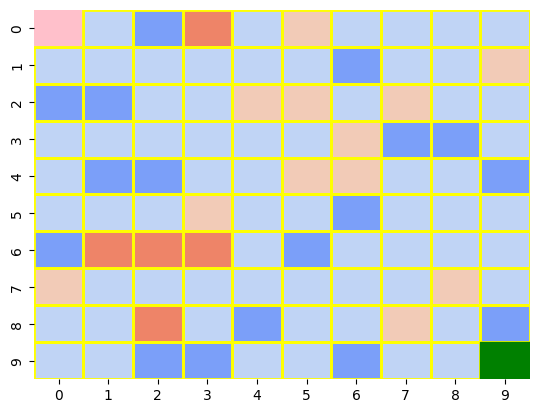

In [97]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    #print(colors)
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i==0 and j==0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i==maze.shape[0]-1 and j==maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()

draw_maze(a)

In [98]:
from myMazeData import defineMazeAvailableActions

mazeAvailableActs = defineMazeAvailableActions(a)
#mazeAvailableActs

In [99]:
from myMazeData import makeMazeTransformationModel

maze = makeMazeTransformationModel(mazeAvailableActs)
#maze

In [100]:
from mazeGraphClass import mazeGraph

mazeWorldGraph = mazeGraph(maze)
#mazeWorldGraph.graph_dict

In [101]:
#mazeWorldGraph.g

In [102]:
from agents import ProblemSolvingMazeAgentAStarManhattan
from myMazeData import getAllFoodLocations

initState, goalState = (0,0), getAllFoodLocations(a)

AStar_MazeAgent1 = ProblemSolvingMazeAgentAStarManhattan(initState,mazeWorldGraph,goalState)

[]


In [103]:
AStar_MazeAgent1.goal

[(0, 5),
 (1, 9),
 (2, 4),
 (2, 5),
 (2, 7),
 (3, 6),
 (4, 5),
 (4, 6),
 (5, 3),
 (7, 0),
 (7, 8),
 (8, 7)]

In [104]:
AStar_MazeAgent1.run()

goal list: [(0, 5), (1, 9), (2, 4), (2, 5), (2, 7), (3, 6), (4, 5), (4, 6), (5, 3), (7, 0), (7, 8), (8, 7)]
current percept: (0, 0)
current goal: (0, 5)
Goal:  (0, 5)
Frontier:  [(5, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Current node has 2 child nodes (expansions).
Goal:  (0, 5)
Frontier:  [(6, <Node (0, 1)>), (7, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (1, 1)>.
Current node has 1 child nodes (expansions).
Goal:  (0, 5)
Frontier:  [(7, <Node (1, 0)>), (8, <Node (1, 1)>)]
The node (1, 0) is extracted from frontier:
Current node has 0 child nodes (expansions).
Goal:  (0, 5)
Frontier:  [(8, <Node (1, 1)>)]
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)>.
Current node has 1 child nodes (expansions).
Goal:  (0, 5)
Frontier:  [(9, <Node (1, 2)>)]
The node (1, 2) is extracted from frontier:
The child node <Node (1, 3)>.
The child node <Node (2, 2)

([['right', 'down', 'right', 'right', 'right', 'right', 'up'],
  ['down', 'down'],
  ['left'],
  ['right', 'right', 'right'],
  ['left', 'down'],
  ['down'],
  ['left'],
  ['down', 'left', 'left'],
  ['down', 'down', 'left', 'left', 'left'],
  ['right', 'right', 'right', 'right', 'right', 'right', 'right', 'right'],
  ['up',
   'up',
   'up',
   'left',
   'left',
   'up',
   'up',
   'right',
   'right',
   'right',
   'up'],
  ['down',
   'left',
   'left',
   'left',
   'down',
   'down',
   'right',
   'down',
   'down',
   'down',
   'down']],
 [[<Node (0, 0)>,
   <Node (0, 1)>,
   <Node (1, 1)>,
   <Node (1, 2)>,
   <Node (1, 3)>,
   <Node (1, 4)>,
   <Node (1, 5)>,
   <Node (0, 5)>],
  [<Node (0, 5)>, <Node (1, 5)>, <Node (2, 5)>],
  [<Node (2, 5)>, <Node (2, 4)>],
  [<Node (2, 4)>, <Node (2, 5)>, <Node (2, 6)>, <Node (2, 7)>],
  [<Node (2, 7)>, <Node (2, 6)>, <Node (3, 6)>],
  [<Node (3, 6)>, <Node (4, 6)>],
  [<Node (4, 6)>, <Node (4, 5)>],
  [<Node (4, 5)>, <Node (5, 5)>, <No

Task 4
---

In [105]:
# function to get the closest food location
def optimizefood(self, currentState, foodLocations):
    return min(foodLocations, key=lambda x: manhattanDistance.calc(currentState, x))

In [106]:
# # get the last goal
# if len(self.goal)==1:
#   current_goal = self.goal[0]
# #get every goal except the last one
# else:
#   current_goal=optimizefood(percept, self.goal[0:-1])



In [107]:
n = 10
a = makeMaze(n)


mazeAvailableActs = defineMazeAvailableActions(a)
maze = makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph = mazeGraph(maze)

initState = (0,0)
finalState = (n-1, n-1)
goalStates = getAllFoodLocations(a)
goalStates.append(finalState)

a1 = ProblemSolvingMazeAgentAStarManhattan(initState, mazeWorldGraph, goalStates)


[]


In [108]:
s,p = a1.run(n)

goal list: [(0, 6), (1, 4), (2, 6), (3, 0), (3, 1), (4, 0), (4, 5), (6, 3), (6, 4), (7, 7), (9, 7), (9, 9)]
current percept: (0, 0)
current goal: (3, 0)
Goal:  (3, 0)
Frontier:  [(3, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Current node has 2 child nodes (expansions).
Goal:  (3, 0)
Frontier:  [(3, <Node (1, 0)>), (6, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Current node has 1 child nodes (expansions).
Goal:  (3, 0)
Frontier:  [(3, <Node (2, 0)>), (6, <Node (0, 1)>)]
The node (2, 0) is extracted from frontier:
The child node <Node (2, 1)>.
The child node <Node (3, 0)>.
Current node has 2 child nodes (expansions).
Goal:  (3, 0)
Frontier:  [(3, <Node (3, 0)>), (6, <Node (2, 1)>), (6, <Node (0, 1)>)]
The node (3, 0) is extracted from frontier:
We have found our goal: (3, 0)
Total expansions: 5
Total cost: 3
<Node (3, 0)>
Solution (a sequence of actions) from the i

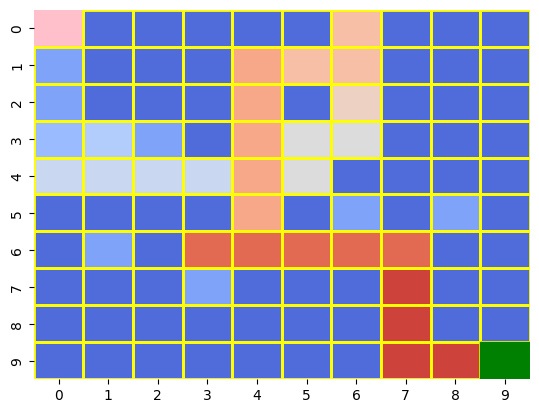

In [109]:
import copy
resolvedMaze=copy.deepcopy(a)
i=3
for path in p:
  for node in path:
     resolvedMaze[node.state[0],node.state[1]]=i
  i+=1

draw_maze(resolvedMaze)

Task 5
---

In [110]:
def getGhostLocations(arr):
    ghost_indices = np.where(arr == 3)
    return list(zip(ghost_indices[0], ghost_indices[1]))



In [111]:
# for path in path_to_goal:
#   for node in path:
#     if node.state in ghostLocations:
#       print("Ghost found at:", node.state)
#       if performance > 0.3 * mazeSize:
#         performance -= 0.1 * performance
#         ghostLocations.remove(node.state)
#         print("Removed ghost: ", node.state)
#         print("performance:", performance)
#       else:
#         # Agent dies
#         print("Agent dies")
#         return [], []
        

[]
goal list: [(0, 4), (3, 2), (3, 3), (3, 9), (4, 1), (4, 2), (6, 9), (7, 4), (7, 8), (8, 6), (8, 9), (9, 0), (9, 9)]
current percept: (0, 0)
current goal: (0, 4)
Goal:  (0, 4)
Frontier:  [(4, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Current node has 2 child nodes (expansions).
Goal:  (0, 4)
Frontier:  [(5, <Node (0, 1)>), (6, <Node (1, 0)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Current node has 1 child nodes (expansions).
Goal:  (0, 4)
Frontier:  [(6, <Node (0, 2)>), (6, <Node (1, 0)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
Current node has 2 child nodes (expansions).
Goal:  (0, 4)
Frontier:  [(6, <Node (1, 0)>), (7, <Node (0, 3)>), (8, <Node (1, 2)>)]
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
Current node has 1 child nodes (expansions).
Goal:  (0, 4)
Frontier:  [(7, <Node 

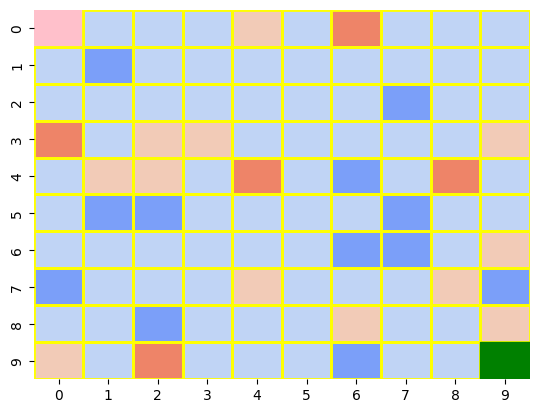

[[1 1 1 1 2 1 3 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [3 1 2 2 1 1 1 1 1 2]
 [1 2 2 1 3 1 0 1 3 1]
 [1 0 0 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 0 1 2]
 [0 1 1 1 2 1 1 1 2 0]
 [1 1 0 1 1 1 2 1 1 2]
 [2 1 3 1 1 1 0 1 1 1]]
[[ 3  3  3  3  4  1  3  1  1  1]
 [ 1  0  1  1  4  1  1  1  1  1]
 [ 1  1  1  1  4  1  1  0  1  1]
 [ 3  1  6  5  4  1  1  1  1 14]
 [ 1  8  8  8  3  1  0  1  3 14]
 [ 1  0  0  8  1  1  1  0  1 14]
 [ 1  1  1  8  1  1  0  0 14 14]
 [ 0  1  1  8  9  1  1  1 14  0]
 [ 1  1  0  1  9 15 15 15 14 13]
 [15 15 15 15 15 15  0 15 15 15]]


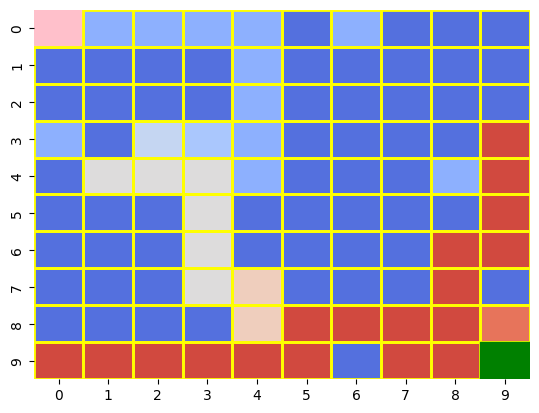

In [112]:
n = 10
a = makeMaze(n)


mazeAvailableActs = defineMazeAvailableActions(a)
maze = makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph = mazeGraph(maze)

initState = (0,0)
finalState = (n-1, n-1)
goalStates = getAllFoodLocations(a)
goalStates.append(finalState)

a1 = ProblemSolvingMazeAgentAStarManhattan(initState, mazeWorldGraph, goalStates)

ghostLocations = getGhostLocations(a)
s,p = a1.run(n, ghostLocations)


print(ghostLocations)
draw_maze(a)


import copy
resolvedMaze=copy.deepcopy(a)
i=3
for path in p:
  for node in path:
     resolvedMaze[node.state[0],node.state[1]]=i
  i+=1


print(a)
print(resolvedMaze)

draw_maze(resolvedMaze)

Task 6
---

In [ ]:
#Testing

from agents import ProblemSolvingMazeAgentIDAStarManhattan
from myMazeData import getAllFoodLocations

initState, goalState = (0,0), getAllFoodLocations(a)

IDAStar_MazeAgent1 = ProblemSolvingMazeAgentIDAStarManhattan(initState,mazeWorldGraph,goalState)

[]


TypeError: MazeProblemSolvingAgentPro.run() missing 2 required positional arguments: 'mazeSize' and 'ghostLocations'